# Problem Statement

This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. 

The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length.

Dependent Variable :- Species

Independent Variable :- Sepal width, Sepal length, Petal width and Petal length.

# Importing Libraries

In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, roc_curve, multilabel_confusion_matrix

from imblearn.over_sampling import RandomOverSampler, SMOTE

import pickle as pkl
import json

# List Initialization

In [60]:
model_list = []
training_accuracy = []
testing_accuracy = []
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_f1_score = []
testing_f1_score = []

# 1.Data Gathering

In [3]:
df = pd.read_csv('iris.csv',index_col= 'Id')
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

# 2.Exploratory Data Analaysis

In [7]:
# Defining x and y

x = df.drop(['Species'],axis =1)
y = df['Species']

In [11]:
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## 2.1 SepalLengthCm

In [9]:
df['SepalLengthCm'].isna().sum()

0

<AxesSubplot:>

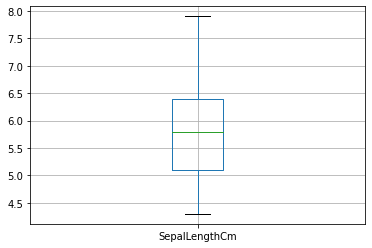

In [13]:
df[['SepalLengthCm']].boxplot()

## 2.2 SepalWidthCm

<AxesSubplot:>

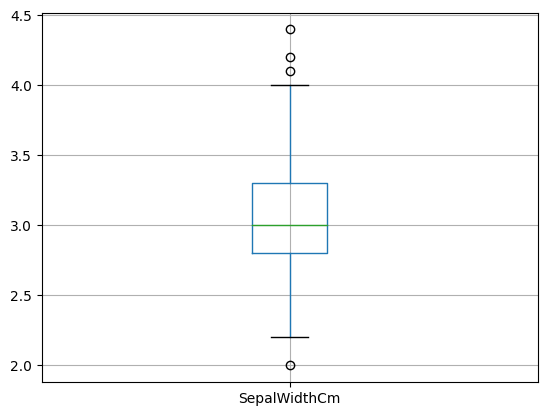

In [15]:
df[['SepalWidthCm']].boxplot()

## 2.3 PetalLengthCm

<AxesSubplot:>

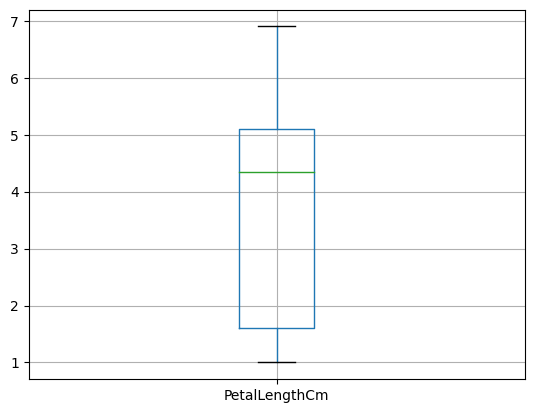

In [16]:
df[['PetalLengthCm']].boxplot()

## 2.4 PetalWidthCm

<AxesSubplot:>

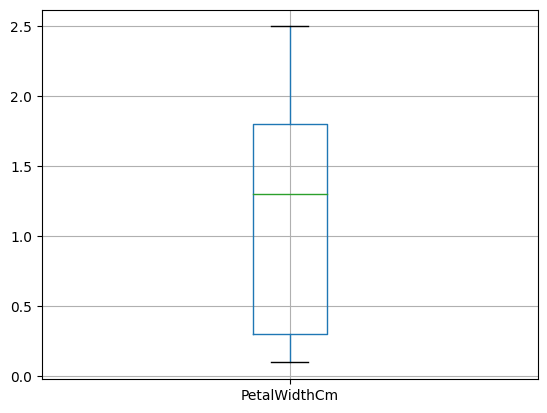

In [17]:
df[['PetalWidthCm']].boxplot()

In [18]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

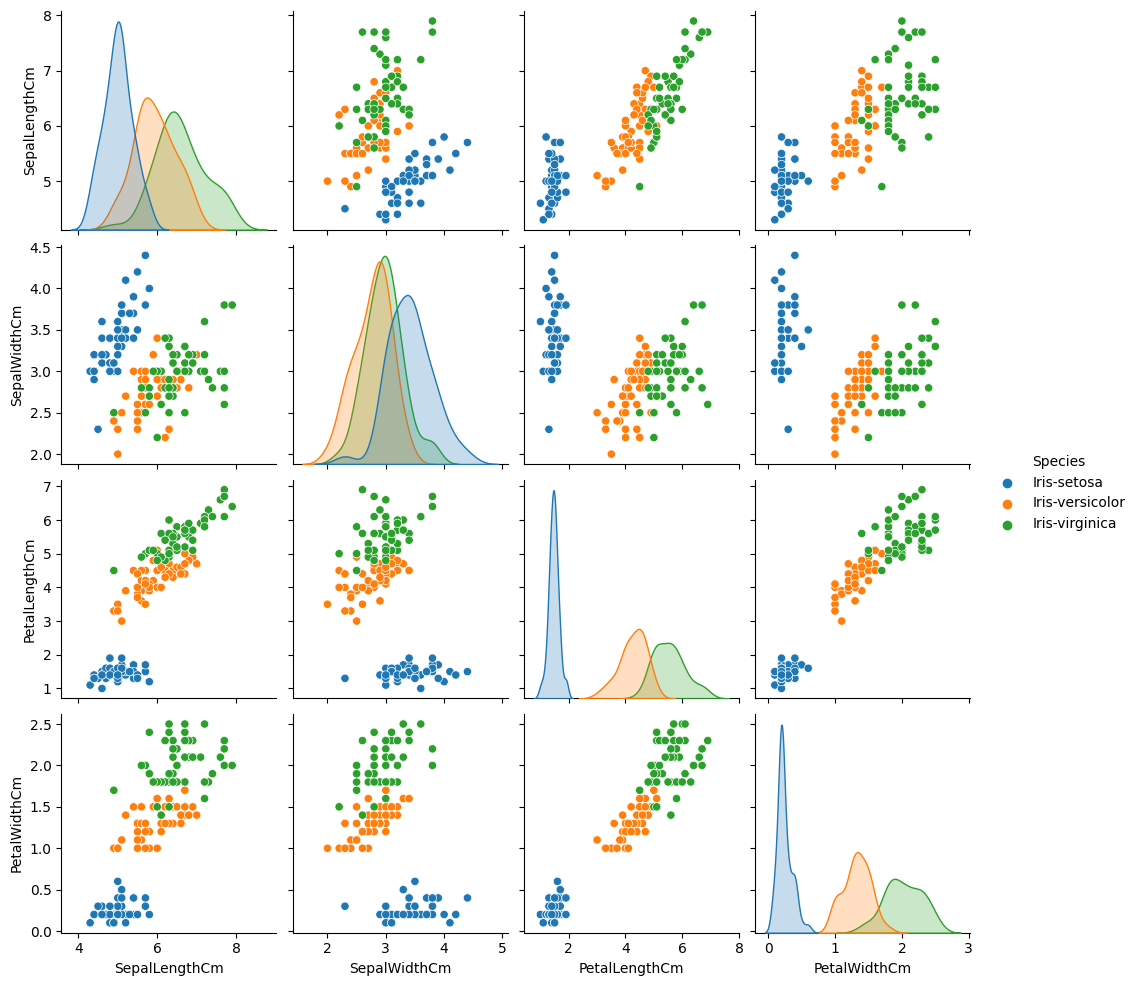

In [19]:
# Visualization of Multiclass Classification
sns.pairplot(df,hue='Species')

# 3. Train Test Split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state= 10, stratify= y )

# 4. Model Training and Evaluation

## 4.1 Logistic Regression

### 4.1.1 Model Training

In [75]:
model_list.append('Logistic Regression')

In [35]:
logistic_model = LogisticRegression(multi_class= 'ovr')
logistic_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

### 4.1.2 Confusion Matrix

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


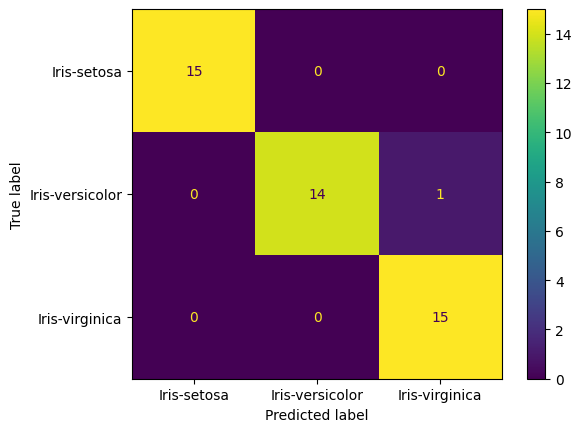

In [36]:
plot_confusion_matrix(logistic_model,x_test, y_test)

### 4.1.3 Model Evaluation

In [61]:
# Testing Data Evaluation
y_pred = logistic_model.predict(x_test)

logistic_cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",logistic_cnf_matrix)
print("*"*88)

logistic_testing_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",logistic_testing_accuracy)
testing_accuracy.append(logistic_testing_accuracy)
print("*"*88)

logistic_testing_precision = precision_score(y_test, y_pred, average='weighted')
print("Precison :",logistic_testing_precision)
testing_precision.append(logistic_testing_precision)
print("*"*88)

logistic_testing_recall = recall_score(y_test, y_pred, average='weighted')
print("Recall :",logistic_testing_recall)
testing_recall.append(logistic_testing_recall)
print("*"*88)

logistic_clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",logistic_clf_report)

Confusion Matrix :
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
****************************************************************************************
Accuracy : 0.9777777777777777
****************************************************************************************
Precison : 0.9791666666666666
****************************************************************************************
Recall : 0.9777777777777777
****************************************************************************************
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [62]:
# Training Data Evaluation
y_pred_train = logistic_model.predict(x_train)

logistic_cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",logistic_cnf_matrix)
print("*"*88)

logistic_train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",logistic_train_accuracy)
training_accuracy.append(logistic_train_accuracy)
print("*"*88)

logistic_train_precision = precision_score(y_train, y_pred_train, average='weighted')
print("Precison :",logistic_train_precision)
training_precision.append(logistic_train_precision)
print("*"*88)

logistic_train_recall = recall_score(y_train, y_pred_train, average='weighted')
print("Recall :",logistic_train_recall)
training_recall.append(logistic_train_recall)
print("*"*88)

logistic_clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",logistic_clf_report)

Confusion Matrix :
 [[35  0  0]
 [ 0 31  4]
 [ 0  2 33]]
****************************************************************************************
Accuracy : 0.9428571428571428
****************************************************************************************
Precison : 0.9437619437619438
****************************************************************************************
Recall : 0.9428571428571428
****************************************************************************************
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.94      0.89      0.91        35
 Iris-virginica       0.89      0.94      0.92        35

       accuracy                           0.94       105
      macro avg       0.94      0.94      0.94       105
   weighted avg       0.94      0.94      0.94       105



## 4.2 KNN Algorithm

### 4.2.1 Model Training

In [76]:
model_list.append('KNN Classifier')

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

## 4.2.2 Confusion Matrix

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


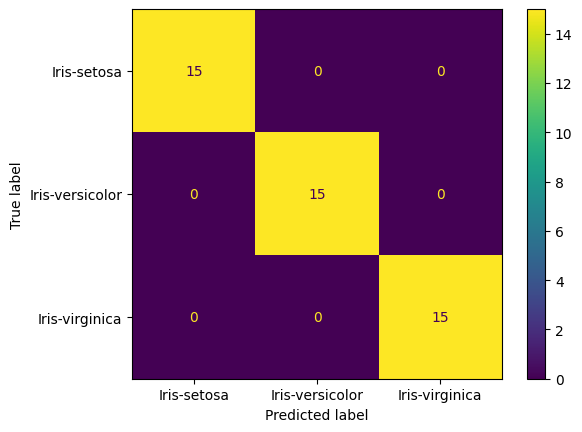

In [40]:
plot_confusion_matrix(knn_model,x_test, y_test)

### 4.2.3 Model Evaluation

In [64]:
# Testing Data Evaluation
y_pred = knn_model.predict(x_test)

knn_cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",knn_cnf_matrix)
print("*"*88)

knn_testing_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",knn_testing_accuracy)
testing_accuracy.append(knn_testing_accuracy)
print("*"*88)

knn_testing_precision = precision_score(y_test, y_pred, average='weighted')
print("Precison :",knn_testing_precision)
testing_precision.append(knn_testing_precision)
print("*"*88)

knn_testing_recall = recall_score(y_test, y_pred, average='weighted')
print("Recall :",knn_testing_recall)
testing_recall.append(knn_testing_recall)
print("*"*88)

knn_clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",knn_clf_report)

Confusion Matrix :
 [[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
****************************************************************************************
Accuracy : 1.0
****************************************************************************************
Precison : 1.0
****************************************************************************************
Recall : 1.0
****************************************************************************************
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [65]:
# Training Data Evaluation
y_pred_train = knn_model.predict(x_train)

knn_cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",knn_cnf_matrix)
print("*"*88)

knn_train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",knn_train_accuracy)
training_accuracy.append(knn_train_accuracy)
print("*"*88)

knn_train_precision = precision_score(y_train, y_pred_train, average='weighted')
print("Precison :",knn_train_precision)
training_precision.append(knn_train_precision)
print("*"*88)

knn_train_recall = recall_score(y_train, y_pred_train, average='weighted')
print("Recall :",knn_train_recall)
training_recall.append(knn_train_recall)
print("*"*88)

knn_clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",knn_clf_report)

Confusion Matrix :
 [[35  0  0]
 [ 0 32  3]
 [ 0  2 33]]
****************************************************************************************
Accuracy : 0.9523809523809523
****************************************************************************************
Precison : 0.9526143790849673
****************************************************************************************
Recall : 0.9523809523809523
****************************************************************************************
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.94      0.91      0.93        35
 Iris-virginica       0.92      0.94      0.93        35

       accuracy                           0.95       105
      macro avg       0.95      0.95      0.95       105
   weighted avg       0.95      0.95      0.95       105



# 4.3 Decision Tree Algorithm

## 4.3.1 Model Training

In [47]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [77]:
model_list.append('Decision Tree')

### 4.3.2 Confusion Matrix

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


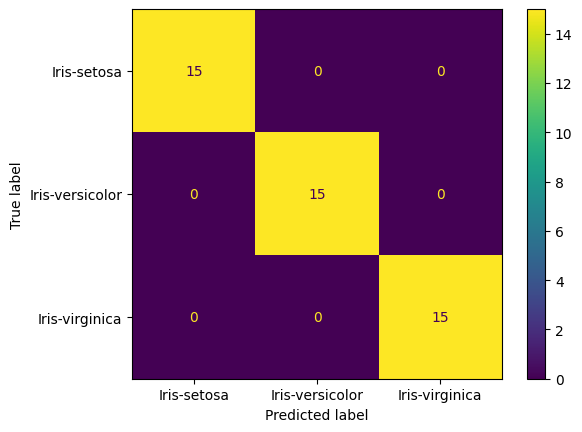

In [48]:
plot_confusion_matrix(dt_model,x_test, y_test)

## 4.3.3 Model Evaluation

In [67]:
# Testing Data Evaluation
y_pred = dt_model.predict(x_test)

dt_cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",dt_cnf_matrix)
print("*"*88)

dt_testing_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",dt_testing_accuracy)
testing_accuracy.append(dt_testing_accuracy)
print("*"*88)

dt_testing_precision = precision_score(y_test, y_pred, average='weighted')
print("Precison :",dt_testing_precision)
testing_precision.append(dt_testing_precision)
print("*"*88)

dt_testing_recall = recall_score(y_test, y_pred, average='weighted')
print("Recall :",dt_testing_recall)
testing_recall.append(dt_testing_recall)
print("*"*88)

dt_clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",dt_clf_report)

Confusion Matrix :
 [[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
****************************************************************************************
Accuracy : 1.0
****************************************************************************************
Precison : 1.0
****************************************************************************************
Recall : 1.0
****************************************************************************************
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [68]:
# Training Data Evaluation
y_pred_train = dt_model.predict(x_train)

dt_cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",dt_cnf_matrix)
print("*"*88)

dt_train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",dt_train_accuracy)
training_accuracy.append(dt_train_accuracy)
print("*"*88)

dt_train_precision = precision_score(y_train, y_pred_train, average='weighted')
print("Precison :",dt_train_precision)
training_precision.append(dt_train_precision)
print("*"*88)

dt_train_recall = recall_score(y_train, y_pred_train, average='weighted')
print("Recall :",dt_train_recall)
training_recall.append(dt_train_recall)
print("*"*88)

dt_clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",dt_clf_report)

Confusion Matrix :
 [[35  0  0]
 [ 0 35  0]
 [ 0  0 35]]
****************************************************************************************
Accuracy : 1.0
****************************************************************************************
Precison : 1.0
****************************************************************************************
Recall : 1.0
****************************************************************************************
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      1.00      1.00        35
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



## 4.3.4 Decision Tree 

In [59]:
plt.figure(figsize=(200,150))
plot_tree(dt_model, feature_names=x.columns, class_names=['setosa','versicolor','virginica'],filled=True)
plt.savefig('Decision_Tree_WithoutHYP.png')

# Conclusion

In [78]:
model_list

['Logistic Regression', 'KNN Classifier', 'Decision Tree']

In [80]:
df_info = pd.DataFrame(list(zip(model_list, training_accuracy,testing_accuracy, training_precision,testing_precision,training_recall,testing_recall )),
               columns =['Algorithm','Training Accuracy','Testing Accuracy','Training Precision', 'Testing Precision', 'Training Recall','Training Recall'])
df_info.set_index('Algorithm', inplace =True)

In [81]:
df_info

Training Accuracy  Testing Accuracy  ...  Training Recall  Training Recall
Algorithm                                                 ...                                  
Logistic Regression           0.942857          0.977778  ...         0.942857         0.977778
KNN Classifier                0.952381          1.000000  ...         0.952381         1.000000
Decision Tree                 1.000000          1.000000  ...         1.000000         1.000000

[3 rows x 6 columns]

<AxesSubplot:xlabel='Algorithm'>

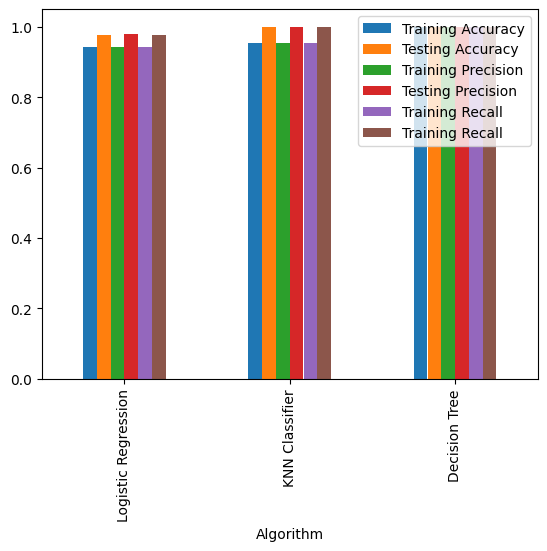

In [82]:

df_info.plot.bar()

### Conclusion

From the comparision **Decision Tree Algorithm** gives us the best Result.

## Creating Model File

In [83]:
with open('Model_File.pkl','wb') as f:
    pkl.dump(dt_model,f)

# Single Data Testing

In [85]:
df.head(2).T

Id                       1            2
SepalLengthCm          5.1          4.9
SepalWidthCm           3.5          3.0
PetalLengthCm          1.4          1.4
PetalWidthCm           0.2          0.2
Species        Iris-setosa  Iris-setosa

In [95]:
SepalLengthCm =   4.5
SepalWidthCm =  3.0
PetalLengthCm =  5.3
PetalWidthCm =  2.5

test_array = np.array([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])
test_array
predicted_class = logistic_model.predict(test_array)[0]
predicted_class

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Iris-virginica'